## Data processing

In [1]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Data samples
df = pd.read_csv('./hmeq.csv')
df.sample(8)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3557,0,18700,110292.0,132953.0,DebtCon,ProfExe,7.0,0.0,0.0,105.424888,0.0,14.0,30.552752
3034,1,16500,43223.0,46925.0,DebtCon,Other,10.0,0.0,0.0,178.002383,4.0,20.0,40.206334
483,1,7000,66000.0,86300.0,DebtCon,Other,3.0,1.0,1.0,242.433333,0.0,8.0,NaN
5062,0,27000,77910.0,117590.0,DebtCon,Other,4.0,0.0,0.0,91.874211,2.0,31.0,38.497155
1757,0,12000,84191.0,100654.0,HomeImp,ProfExe,0.0,0.0,0.0,79.677885,1.0,20.0,33.773303
5843,0,50800,NaN,91305.0,HomeImp,Other,NaN,0.0,0.0,344.954178,0.0,7.0,23.519129
2126,0,13300,66174.0,79957.0,DebtCon,Other,2.0,NaN,NaN,175.962695,NaN,34.0,31.563441
4097,0,21400,49459.0,69461.0,DebtCon,Other,25.0,0.0,0.0,314.638958,2.0,32.0,35.982084


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
# Information of missing values
df.isna().sum()
miss = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
miss # percentage of missing values in each column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.086913,0.018792,0.042282,0.046812,0.086409,0.118792,0.097315,0.051678,0.08557,0.037248,0.212584


In [9]:
# Drop rows with more than 5 missing values
misscol = ['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
df = df.dropna(subset=misscol, thresh=5, axis='rows')
df.isna().sum()
miss_new = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
miss_new # new percentage of missing values in each column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.075591,0.016284,0.028625,0.029825,0.069935,0.09976,0.07782,0.031196,0.065821,0.016455,0.21049


In [11]:
# Fill in the missing values
# for numerical values, using median
ncols=['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DELINQ','DEROG','CLAGE', 'NINQ','CLNO','DEBTINC']
for col in ncols:
    df[col].fillna(df[col].median(),inplace=True)

# For categorical values, using mode
ccols= ['REASON','JOB']
for col in ccols:
    df[col].fillna(df[col].mode()[0],inplace=True)

df.isna().sum()
after_fill = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
after_fill

/var/folders/98/lsc2syg95yv0ysvqbh6k8qdr0000gn/T/ipykernel_1507/2503434046.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
/var/folders/98/lsc2syg95yv0ysvqbh6k8qdr0000gn/T/ipykernel_1507/2503434046.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000
mean,0.199006,18724.494344,73226.917929,101902.621964,8.780202,0.229174,0.414467,179.569750,1.173809,21.274769,34.104860
std,0.399287,11257.210956,42886.430090,57185.969936,7.318917,0.806347,1.089184,84.467870,1.671442,10.056505,7.601515
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11200.000000,48021.250000,66551.750000,3.000000,0.000000,0.000000,116.619327,0.000000,15.000000,30.846896
50%,0.000000,16400.000000,65030.000000,89609.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.888239
75%,0.000000,23500.000000,88898.000000,119088.250000,12.000000,0.000000,0.000000,229.129833,2.000000,26.000000,37.991728
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [15]:
# Correlation analysis
correlation_matrix = df[ncols].corr()
correlation_matrix

,LOAN,MORTDUE,VALUE,YOJ,DELINQ,DEROG,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.214294,0.326640,0.097166,-0.033035,0.004103,0.088048,0.044479,0.073484,0.062959
MORTDUE,0.214294,1.000000,0.790303,-0.076272,0.001596,-0.048789,0.129802,0.032131,0.318805,0.133683
VALUE,0.326640,0.790303,1.000000,0.013186,-0.010441,-0.045744,0.169946,-0.003190,0.265650,0.112592
YOJ,0.097166,-0.076272,0.013186,1.000000,0.050540,-0.058858,0.186446,-0.063344,0.032487,-0.049339
DELINQ,-0.033035,0.001596,-0.010441,0.050540,1.000000,0.169408,0.025784,0.058455,0.160407,0.045597
DEROG,0.004103,-0.048789,-0.045744,-0.058858,0.169408,1.000000,-0.079989,0.146107,0.051366,0.018230
CLAGE,0.088048,0.129802,0.169946,0.186446,0.025784,-0.079989,1.000000,-0.109913,0.233661,-0.042598
NINQ,0.044479,0.032131,-0.003190,-0.063344,0.058455,0.146107,-0.109913,1.000000,0.085658,0.121637
CLNO,0.073484,0.318805,0.265650,0.032487,0.160407,0.051366,0.233661,0.085658,1.000000,0.161042
DEBTINC,0.062959,0.133683,0.112592,-0.049339,0.045597,0.018230,-0.042598,0.121637,0.161042,1.000000


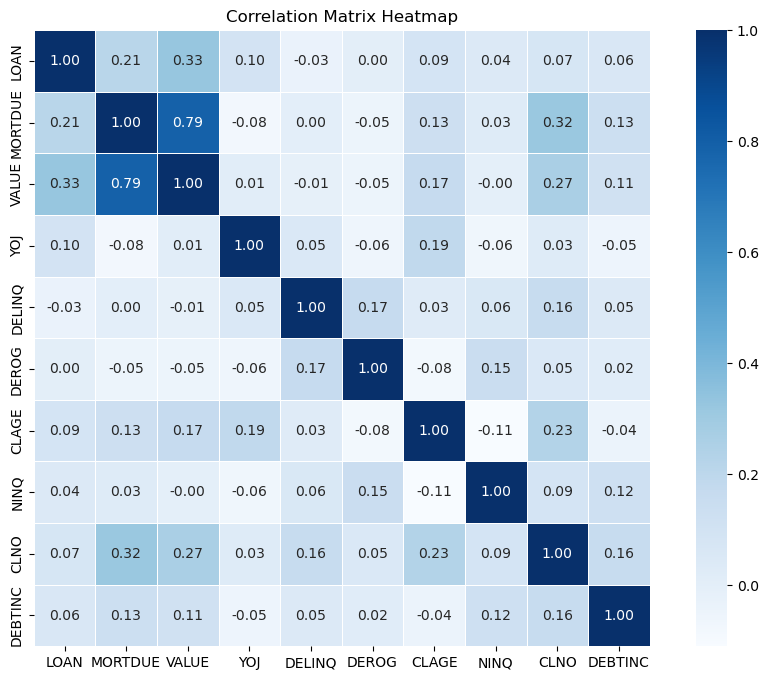

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = oe.fit_transform(df[categorical_columns])

In [23]:
X = df.drop('BAD',axis='columns')
y = df['BAD']
print(X.shape, y.shape)

(5834, 12) (5834,)


In [25]:
# Split training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2)
train_df = pd.DataFrame(x_train).assign(target=y_train.values)
test_df = pd.DataFrame(x_test).assign(target=y_test.values)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
unbalanced = pd.DataFrame(data=[y_train.value_counts(),y_train.value_counts()/y_train.shape[0]])
unbalanced

BAD,0,1
count,3505.000000,870.000000
count,0.801143,0.198857


In [27]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON     float64
JOB        float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [29]:
# Deal with unbalanced data
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)
train_df_smt = pd.DataFrame(x_train).assign(target=y_train.values)
train_df_smt.to_csv('train_data_balanced.csv', index=False)

In [31]:
balanced = pd.DataFrame(data=[y_train.value_counts(),y_train.value_counts()/y_train.shape[0]])
balanced

BAD,0,1
count,3505.0,3505.0
count,0.5,0.5


## Prediction

In [34]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix

In [36]:
# XGboost feature importance
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(params, dtrain, num_boost_round=100)

importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

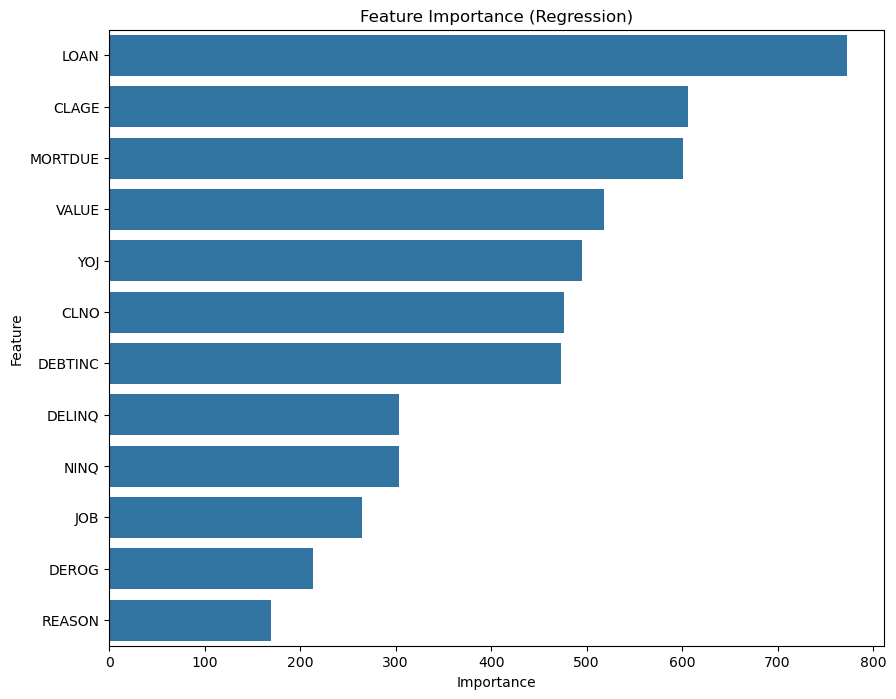

In [38]:
features = ['X' + str(i) for i in range(1, X.shape[1] + 1)]
feature_importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title('Feature Importance (Regression)')
plt.show()

In [40]:
top_n = 7
top_features = [f for f, _ in sorted_importance[:top_n]]
top_features

['LOAN', 'CLAGE', 'MORTDUE', 'VALUE', 'YOJ', 'CLNO', 'DEBTINC']

In [42]:
# XGboost
from xgboost import XGBClassifier
x_train_new = x_train[top_features]
x_test_new = x_test[top_features]
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('F1_Score :',f1_score(y_test,y_pred))
print('ROC_AUC_Score',roc_auc_score(y_test,y_pred))

Accuracy Score : 0.9191226867717615
F1_Score : 0.7846715328467153
ROC_AUC_Score 0.851436355505343
